# Lezione 12

In questa lezione utilizziamo reti neurali convoluzionali per risolvere un probelma di classificazione di immagini. 
Le immagini considerate sono cifre scritte a mano rappresentate in un formato di 28x28 pixel dove ogni pixel può assumere 256 gradazioni di grigio. Prima di passare alle CNN risolviamo il problema con una DNN.

## Deep Neural Network





In [20]:
#PREPARATION OF TRAINING AND TEST SETS

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist #to load training and validation dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# X_train.shape = (60000,28,28), X_test.shape = (10000,28,28) 
# Y_train.shape = (60000,), Y_test.shape = (10000,)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) 
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#X_train.shape = (60000, 784)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
#Y_train.shape(60000, 10)

In [21]:
#DEFINITION, COMPILATION AND TRAINING OF DNN

def create_DNN():

    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(optimiz):

    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimiz,
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model(SGD())
model_DNN.summary()

#save model
#path = 'Saved/DNN'
#model_DNN.save(filepath = path, include_optimizer = True)

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               40100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 201us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3099 - val_accuracy: 0.9183
Epoch 2/5
60000/60000 [=========================

10000/10000 [==============================] - 1s 63us/step

Test loss: 0.15405657771155237
Test accuracy: 0.9535999894142151


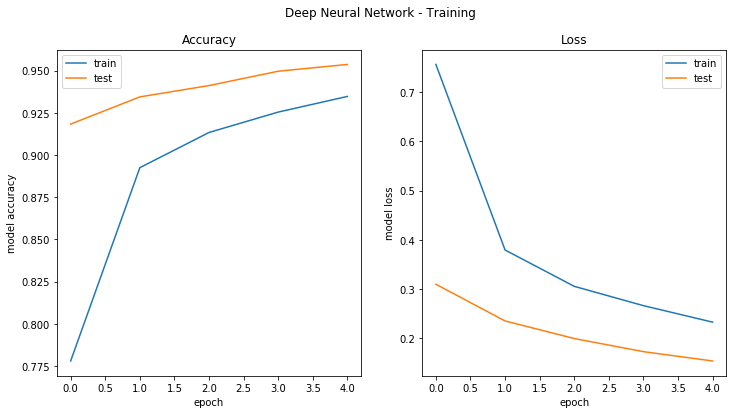

In [7]:
# MODEL EVALUATION AND TRAINING HISTORY

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# summarize history for accuracy
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.title('Loss')
plt.legend(['train', 'test'], loc='best')

plt.suptitle("Deep Neural Network - Training")
plt.show()

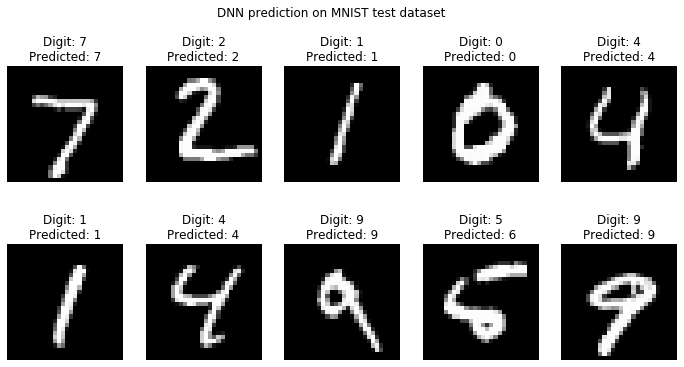

In [12]:
# PREDICTIONS

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#predictions
predictions = model_DNN.predict(X_test)
#comapare predictions with correct results
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
plt.figure(figsize=(12,6))
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)   
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off') 
plt.suptitle("DNN prediction on MNIST test dataset")
plt.show()


Come osserviamo, per le cifre considerate, la DNN esegue associazioni corrette a eccezione della cifra 5. 

## 12.1 

Ora vediamo come variano l'accuracy e la loss sul training set al variare dell'ottimizzatore, per gli ottimizzatori SDG, ADAM e ADAGRAD: 

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 301us/step - loss: 0.2933 - accuracy: 0.9125 - val_loss: 0.1151 - val_accuracy: 0.9646
Epoch 2/5
60000/60000 [==============================] - 18s 300us/step - loss: 0.1216 - accuracy: 0.9652 - val_loss: 0.0811 - val_accuracy: 0.9739
Epoch 3/5
60000/60000 [==============================] - 18s 299us/step - loss: 0.0876 - accuracy: 0.9741 - val_loss: 0.0801 - val_accuracy: 0.9782
Epoch 4/5
60000/60000 [==============================] - 18s 302us/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.0728 - val_accuracy: 0.9772
Epoch 5/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0812 - val_accuracy: 0.9768
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 229us/step - loss: 0.2854 - accuracy: 0.9166 - val_loss: 0.1263 - val_accuracy: 0.9605
Epoch 2/5
60

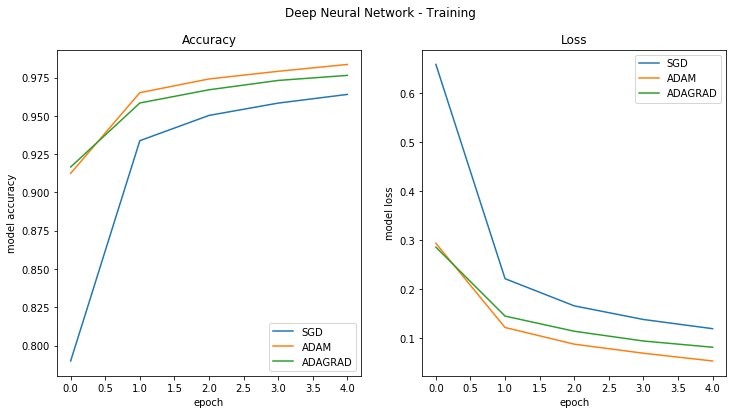

In [29]:
from keras.optimizers import adam, adagrad
# create the deep neural net
model_DNN_Adam = compile_model(adam())
model_DNN_Adagrad = compile_model(adagrad())
# train DNN and store training info in history
history_Adam = model_DNN_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
history_Adagrad = model_DNN_Adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# look into training history
# summarize history for accuracy
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(history.history['accuracy'], label="SGD")
#plt.plot(history.history['val_accuracy'])
plt.plot(history_Adam.history['accuracy'], label="ADAM")
#plt.plot(history_Adam.history['val_accuracy'])
plt.plot(history_Adagrad.history['accuracy'], label="ADAGRAD")
#plt.plot(history_Adagrad.history['val_accuracy'])
plt.legend(loc='best')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.title('Accuracy')

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'], label="SGD")
#plt.plot(history.history['val_accuracy'])
plt.plot(history_Adam.history['loss'], label="ADAM")
#plt.plot(history_Adam.history['val_accuracy'])
plt.plot(history_Adagrad.history['loss'], label="ADAGRAD")
#plt.plot(history_Adagrad.history['val_accuracy'])
plt.legend(loc='best')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.title('Loss')

##
plt.suptitle("Deep Neural Network - Training")
plt.show()



Notiamo che, ad differenza della lezione 11 in cui sgd risultava il l'ottimizzatore più efficiente, questa volta, tra quelli considerati, è il peggiore. Il più efficiente è adam. 



## 12.2 Convolutional Neural Network

Ora proviamo ad affontare lo stesso probelma con una CNN. 

In [9]:
# DATA PREPARATION


from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

Costruiamo una CNN formata da:
- un convoution layer di 10 filtri
- un pooling layer di matrici 2x2
- un convolution layer di 20 filtri
- un pooling layer 2x2
- un layer 1D di 160 neuroni
- output layer

In [10]:
# DEFINITION, COMPILATION AND TRAINING OF DNN
    
def create_CNN():

    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))

    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(20, kernel_size=(5,5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(160,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model


# create the deep conv net
model_CNN=create_CNN()
model_CNN.summary()

#save model
#path = 'Saved/CNN'
#model_CNN.save(filepath = path, include_optimizer = True)

# train CNN
batch_size = 32
epochs = 5
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

   


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 160)               51360     
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)             

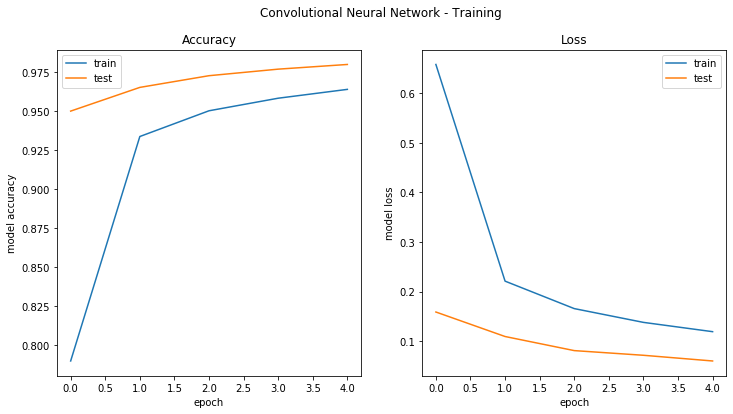

10000/10000 [==============================] - 2s 178us/step

Test loss: 0.0601377195967827
Test accuracy: 0.9800000190734863


In [15]:
# EVALUATION

# look into training history
# summarize history for accuracy
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='best')
# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.title('Loss')
plt.legend(['train', 'test'], loc='best')
##
plt.suptitle("Convolutional Neural Network - Training")
plt.show()

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Osserviamo che sebbene la CNN considerata abbia un minor numero di paramentri rispetto alla DNN, dalla valutazione di questi modelli sul Test set osserviamo che la CNN dà una loss minore e un accuratezza superiore, pertanto la gemoetria di una CNN è più adatta di quella di un DNN per risolvere un problema di riconoscimenti di immagini. 

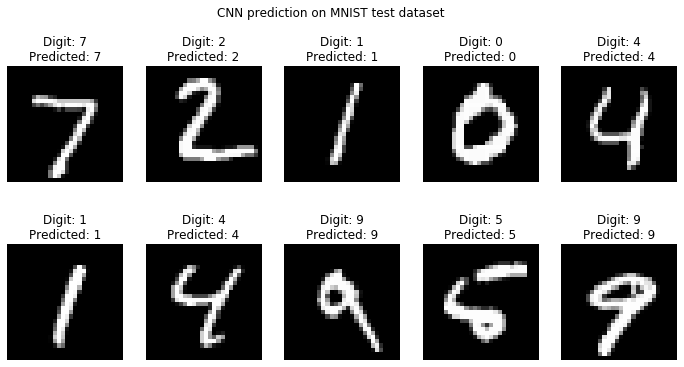

In [11]:
# PREDICTIONS

predictions = model_CNN.predict(X_test) 
plt.figure(figsize=(12,6))
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.suptitle("CNN prediction on MNIST test dataset")
plt.show()


Questa volta il modello non ha commesso errori nel fare predizioni.

## 12.3
Infine osserviamo come si comportano il DNN e la CNN su cifre scritte a mano da me.

In [12]:

xdim, ydim = 28, 28
mydigitsCNN = np.zeros(( 10, xdim, ydim, 1 ))
mydigitsDNN = np.zeros(( 10, xdim*xdim ))
for i in range(10):
   digit_filename = "n"+str(i)+".png"
   digit_in = Image.open(digit_filename).convert('L')
   pix=digit_in.load()
   data = np.zeros((xdim, ydim))
   for j in range(ydim):
      for k in range(xdim):
        data[k,j]=pix[j,k]
   data /= 255
   mydigitsCNN[i,:,:,:] = data.reshape(xdim,ydim,1)
   mydigitsDNN[i,:] = data.reshape(xdim*ydim)


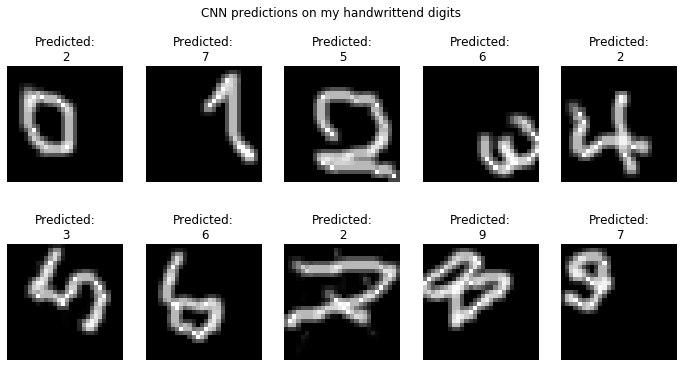

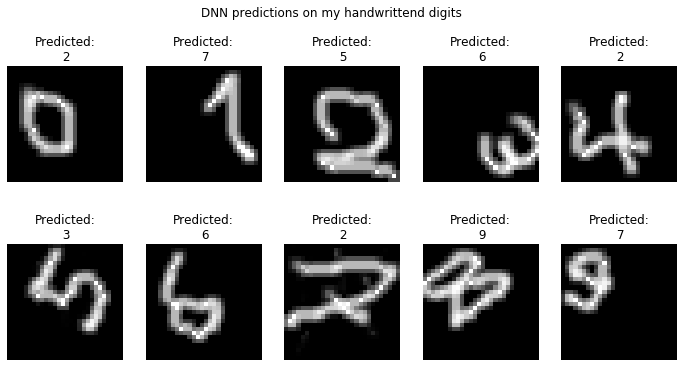

In [17]:
plt.figure(figsize=(12, 6)) 
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(mydigitsCNN[i, :, :, 0], cmap='gray')    
    plt.title("Predicted:\n {}".format(np.argmax(predictions[i])))   
    plt.axis('off')
plt.suptitle('CNN predictions on my handwrittend digits') 
plt.show()


predictions = model_DNN.predict(mydigitsDNN)
plt.figure(figsize=(12,6)) 
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(mydigitsDNN[i, :].reshape(xdim,ydim), cmap='gray')    
    plt.title("Predicted:\n {}".format(np.argmax(predictions[i])))   
    plt.axis('off')
plt.suptitle('DNN predictions on my handwrittend digits') 
plt.show()


Questa volta non osservo differenze nel comportamento della CNN e DNN: entrambe falliscono nell'associare le immagini alle cifre corrette eccetto che per la cifra 6.